# This script 
=> loads preprocessed training data 

=> splits it into training and validation sets 

=> compiles UNet++ model using the Adam optimizer with a binary cross-entropy loss function 

=> trains each model for a specified number of epochs 

=> ModelCheckpoint callbacks are used to save the best-performing models based on validation accuracy during training

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import MeanIoU
from keras.models import load_model
import matplotlib.pyplot as plt

# Load preprocessed data

In [2]:

X_train = np.load(r'path\X_train.npy')
y_train = np.load(r'path\y_train.npy')
X_val = np.load(r'path\X_val.npy')
y_val = np.load(r'path\y_val.npy')
X_test = np.load(r'path\X_test.npy')
y_test = np.load(r'path\y_test.npy')

# Load or define the Resnet model

In [3]:
model = load_model(r'path\resnet.keras')

# Compile the model

In [4]:
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Train the model

In [5]:
history = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - accuracy: 0.5862 - loss: 19.4636 - val_accuracy: 0.6550 - val_loss: 2.9930
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.7074 - loss: 0.5455 - val_accuracy: 0.3481 - val_loss: 54.4065
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 11s/step - accuracy: 0.7446 - loss: 0.5104 - val_accuracy: 0.3483 - val_loss: 169.7086
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 9s/step - accuracy: 0.8081 - loss: 0.4082 - val_accuracy: 0.3450 - val_loss: 630.2225
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 11s/step - accuracy: 0.7877 - loss: 0.4454 - val_accuracy: 0.3461 - val_loss: 282.5884
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 47s 11s/step - accuracy: 0.8281 - loss: 0.4092 - val_accuracy: 0.3461 - val_loss: 183.0937
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 9s/step - accuracy: 0.8391 - loss: 0.3762 - val_accuracy: 0.3460 - val_loss: 154.4057
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 45s 11s/step - accuracy: 0.8324 - loss: 0.3928 - val_accuracy: 0.3492 - val_loss:

# Save the model

In [6]:
model.save('resnet_trained_model.keras')

# Get training and validation loss from the history object

In [7]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss

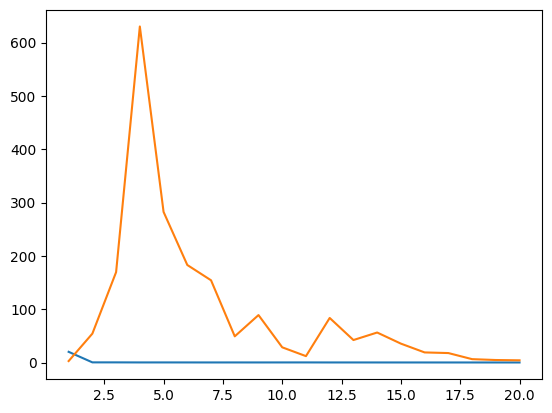

In [12]:
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')